## 허프변환

### 원 검출

원의 방정싞:(x-a)^2 + (y-b)^2 =c ^2 

속도 향상을 위해 Hough gradient method사용

- 입력영상과 동일한 2차원 평면 공간에서 축적 영상 생성

- 에지 픽셀에서 그래디언트 계산

- 에지 방향에 따라 직선 그리며 값 누적

- 원의 중심을 먼저 찾고, 적절한 반지름 검출

- 단점

   - 여러 동심원 검출 못함(가장 작은 원 하나만 검출)
   
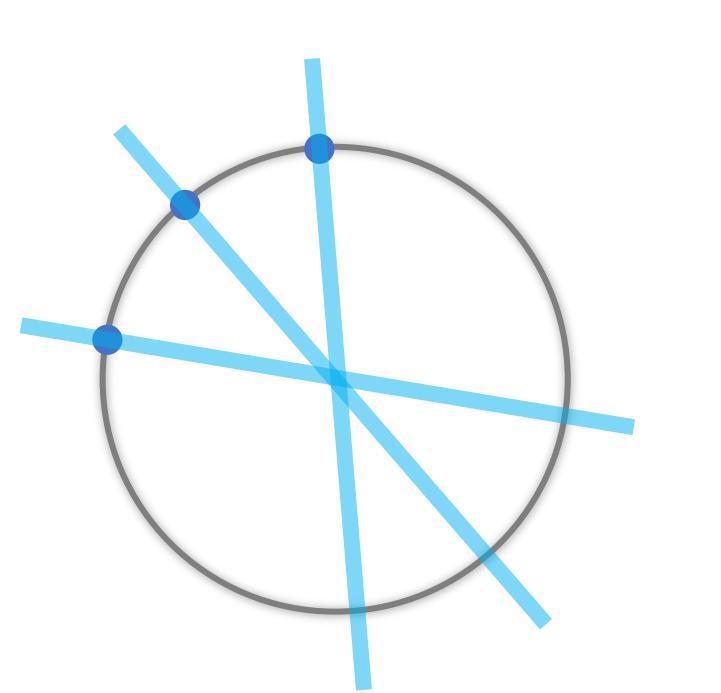


#### 원 검출 함수

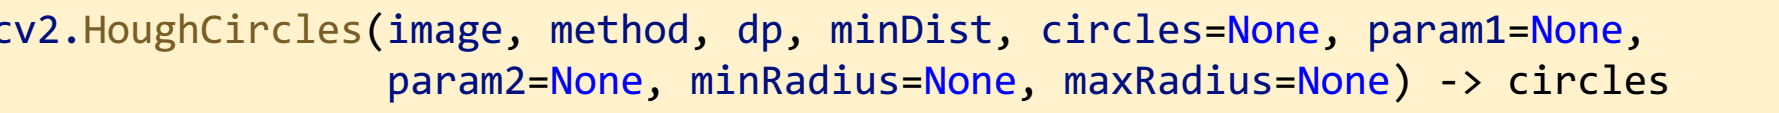


- image: 입력 영상. (에지 영상이 아닌 일반 영상)

- method: OpenCV 4.2 이하에서는 cv2.HOUGH_GRADIENT만 지정 가능

- dp: 입력 영상과 축적 배열의 크기 비율. 1이면 동일 크기.2이면 축적 배열의 가로, 세로 크기가 입력 영상의 반.

- minDist: 검출된 원 중심점들의 최소 거리

- circles: (cx, cy, r) 정보를 담은 numpy.ndarray. shape=(1, N, 3), dtype=np.float32.

- param1: Canny 에지 검출기의 높은 임계값

- param2: 축적 배열에서 원 검출을 위한 임계값

- minRadius, maxRadius: 검출할 원의 최소, 최대 반지름

#### 허프 원 검출과 cv2.HOUGH_GRADIENT_ALT방법

- Opencv 4.3부터 지원

- cv2.HOUGH_GRADIENT방법보다 정확한 원 검출가능

- 사용법:https://docs.opencv.org/4.3.0/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d

### 예제

In [ ]:
src = cv2.imread('dial.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 0.5) # cv2.Hough_GRADIENT방법 사용 시 블러링 권장
def on_trackbar(pos):
rmin = cv2.getTrackbarPos('minRadius', 'img')
rmax = cv2.getTrackbarPos('maxRadius', 'img')
th = cv2.getTrackbarPos('threshold', 'img')
circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
param1=120, param2=th, minRadius=rmin, maxRadius=rmax)
dst = src.copy()
if circles is not None:
for i in range(circles.shape[1]):
cx, cy, radius = circles[0][i]
cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)

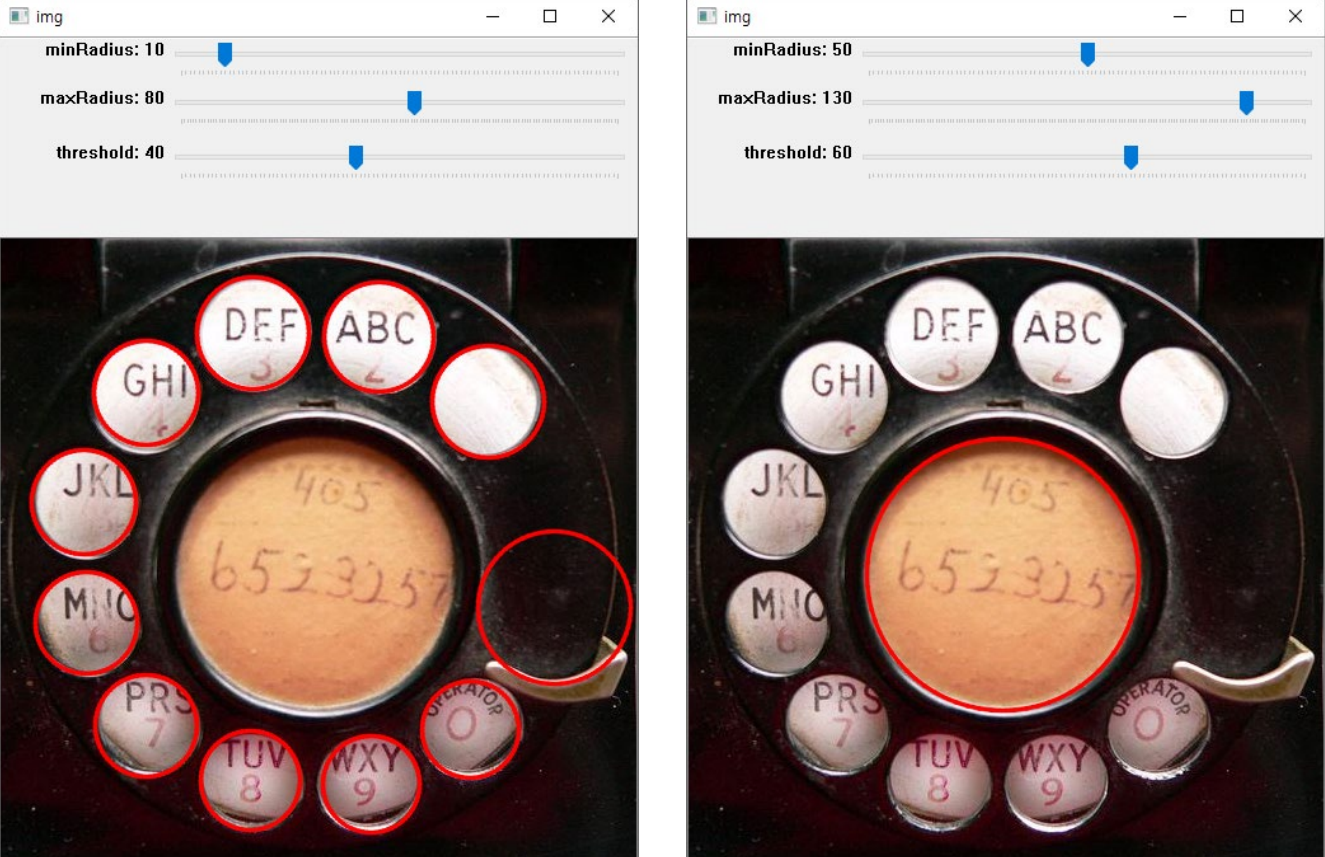